In [ ]:
!pip install swifter 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
### import google drive in order to access the dataset

In [2]:
# import necessary packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [3]:
# read both csv files [true and fake datasets] 

fake = pd.read_csv("/content/gdrive/MyDrive/Datasets/Fake or True News/Fake.csv")
true = pd.read_csv("/content/gdrive/MyDrive/Datasets/Fake or True News/True.csv")

In [ ]:
# peak into data

In [4]:
fake.head(4)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [7]:
# first passage
fake.text[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [8]:
true.head(4)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"


In [9]:
true.text[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [10]:
## include the labels for each dataset

fake["label"] = "fake"
true["label"] = "true"

In [11]:
fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake


In [12]:
true.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true


In [15]:
## merge the two dataframes
df_new = pd.concat([true, fake], axis=0)
df_new.head(3)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true


In [16]:
## function to clean dataset


import re 
def preprocess_text(sen):
    sen = str(sen)

    # Removing html tags
    sentence = remove_tags(sen)
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
     return TAG_RE.sub('', text)

In [24]:
## text function on a single text
preprocess_text(df_new.text[14])

' In Dec story in second paragraph corre Abigail Disney is an heiress with brass ovarie Name text dtype object'

In [31]:
import swifter
sentences_df = df_new.text.swifter.apply(preprocess_text)


/usr/local/lib/python3.7/dist-packages/swifter/swifter.py:37: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  "This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`."


In [33]:
sentences_df = pd.DataFrame(sentences_df)
df_updated = pd.concat([df_new.label, sentences_df], axis=1)
df_updated.head(3)

,label,text
0,true,WASHINGTON Reuters The head of conservative Re...
1,true,WASHINGTON Reuters Transgender people will be ...
2,true,WASHINGTON Reuters The special counsel investi...


In [34]:
## mix up the labels
df_final = df_updated.sample(frac=0.1, replace=True, random_state=1)
df_final.head(3)

,label,text
11586,fake,Nigel Farage tells the CPAC crowd his favouri...
12172,true,BRUSSELS Reuters The European Union agreed on ...
5192,true,WASHINGTON Reuters The White House counsel off...


In [37]:
## check for null values
df_final.isnull().sum()

label    0
text     0
dtype: int64

In [35]:
df_final.label.value_counts()

fake    2376
true    2114
Name: label, dtype: int64

Text(0, 0.5, 'Counts')

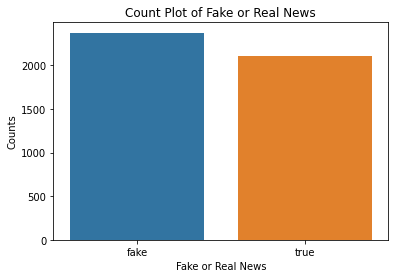

In [36]:
sns.countplot(x="label",data=df_final)
plt.title("Count Plot of Fake or Real News")
plt.xlabel("Fake or Real News")
plt.ylabel("Counts")

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
df_final['label'] = label_encoding.fit_transform(df_final['label'])

In [53]:
## split dataset into train and test
X = df_final["text"]
y = df_final['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [54]:
### check if the daat splits are in the right shape format
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3592,)
Shape of X_test: (898,)
Shape of y_train: (3592,)
Shape of y_test: (898,)


In [57]:
# instantiate the naive model
naive_model = Pipeline([('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

naive_model

Pipeline(memory=None,
         steps=[('vector',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
# use model to train dataset

naive_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [60]:
## use to make prediction

predictions = naive_model.predict(X_test)


In [64]:
# Check model performance
model_accuracy = accuracy_score(y_test, predictions)
print(f'Naive model has {model_accuracy.round(2)*100}% accuracy')
print('\n')
print(classification_report(y_test, predictions))

Naive model has 92.0% accuracy


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       462
           1       0.93      0.91      0.92       436

    accuracy                           0.92       898
   macro avg       0.92      0.92      0.92       898
weighted avg       0.92      0.92      0.92       898

